In [2]:
# 초기 설정

from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import math
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
import json
import os
import pandas
import requests
from sklearn.preprocessing import MinMaxScaler
import time
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import re, seaborn as sns, numpy as np, pandas as pd, random
from pylab import *
from matplotlib.pyplot import plot, show, draw, figure, cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap


headers = {
    'accept': 'application/json',
    'x-api-key': 'GfWsaQabFx841lpntCkbG16ym46BFY019ck8GrEv',
    'encoding': 'UTF-8',
}


In [173]:
# 가져올 json 파일 선택, 원하는 json만 가져오기

file_path = "gfriend.json"

with open(file_path,'r',encoding='UTF-8') as file:
    json_file = json.load(file)

info = []

for js in json_file:
    if js['matchingMode'] == 3 and js['matchingTeamMode'] == 1 and js['seasonId'] == 9:
        info.append(js)

len(info)


6144

In [174]:
# 가져온 json에서 특정 값들만 List에 저장

characterLevel = []
gameRank = []
playerKill = []
monsterKill = []
bestWeaponLevel = []
mmrGain = []
totalTime = []
craftLegend = []
craftEpic = []
damageToPlayer = []
damageFromPlayer = []
damageToMonster = []
giveUp = []
killerUserNum = []
useEmoticonCount = []
ccTimeToPlayer = []
characterNum = []
userNum = []
gameId = []

for js in info:
    characterLevel.append(js['characterLevel'])
    gameRank.append(js['gameRank'])
    playerKill.append(js['playerKill'])
    monsterKill.append(js['monsterKill'])
    bestWeaponLevel.append(js['bestWeaponLevel'])
    mmrGain.append(js['mmrGain'])
    totalTime.append(js['totalTime'])
    craftLegend.append(js['craftLegend'])
    craftEpic.append(js['craftEpic'])
    damageToPlayer.append(js['damageToPlayer'])
    damageFromPlayer.append(js['damageFromPlayer'])
    damageToMonster.append(js['damageToMonster'])
    giveUp.append(js['giveUp'])
    killerUserNum.append(js['killerUserNum'])
    useEmoticonCount.append(js['useEmoticonCount'])
    characterNum.append(js['characterNum'])
    userNum.append(js['userNum'])
    gameId.append(js['gameId'])
    

    



In [175]:
# 가져온 List를 pandas DataFrame으로 저장

totalPoints = pandas.DataFrame(characterLevel).reset_index(drop=True)
totalPoints.columns = ['characterLevel']
totalPoints['gameRank'] = gameRank
totalPoints['playerKill'] = playerKill
totalPoints['monsterKill'] = monsterKill
totalPoints['bestWeaponLevel'] = bestWeaponLevel
totalPoints['mmrGain'] = mmrGain
totalPoints['totalTime'] = totalTime
totalPoints['craftLegend'] = craftLegend
totalPoints['craftEpic'] = craftEpic
totalPoints['damageToPlayer'] = damageToPlayer
totalPoints['damageFromPlayer'] = damageFromPlayer
totalPoints['damageToMonster'] = damageToMonster
totalPoints['giveUp'] = giveUp
totalPoints['killerUserNum'] = killerUserNum
totalPoints['useEmoticonCount'] = useEmoticonCount 
totalPoints['characterNum'] = characterNum
totalPoints['userNum'] = userNum
totalPoints['gameId'] = gameId

totalPoints.head(n=10)


,characterLevel,gameRank,playerKill,monsterKill,bestWeaponLevel,mmrGain,totalTime,craftLegend,craftEpic,damageToPlayer,damageFromPlayer,damageToMonster,giveUp,killerUserNum,useEmoticonCount,characterNum,userNum,gameId
0,19,1,8,29,19,31,1179,0,7,29014,12432,41809,0,0,1,17,824539,17130454
1,18,1,5,46,18,21,1122,3,8,16894,7126,57333,0,0,1,17,824539,17130306
2,11,13,1,10,10,-17,393,0,7,7031,4225,9479,0,563330,1,17,824539,17130258
3,19,1,7,44,19,30,1081,2,10,24017,7739,64079,0,0,1,17,824539,17130152
4,19,1,5,34,18,24,1172,3,9,19869,4694,55014,0,0,1,17,824539,17130036
5,12,8,5,10,12,0,478,0,9,10063,5297,10565,0,2955156,1,17,824539,17129984
6,14,6,4,21,14,3,734,1,5,11504,7350,24228,0,538367,1,17,824539,17129892
7,18,1,4,40,16,16,1206,2,6,15800,8694,42042,0,0,1,17,824539,17129752
8,16,5,5,28,15,13,800,1,6,11982,7521,35163,0,392095,1,12,824539,17129664
9,18,4,3,44,16,3,1130,2,7,11134,6783,53477,0,103170,1,12,824539,17129511


In [176]:
# 가져온 전체 데이터 중에 살펴볼 데이터 subSet

col = [
    'gameRank','playerKill','monsterKill', 'characterLevel','bestWeaponLevel','damageToPlayer', 'totalTime'
 #   ,'userNum','gameId'
]
points = totalPoints.reindex(columns=col)
#points.to_csv('csv.csv',mode='w')



In [177]:
#캐릭터별로 좀 나눠서 비교

points1 = points



points1.head(n=5)

test = points1.loc[totalPoints['characterNum'] == 1]

print(points.describe())



          gameRank   playerKill  monsterKill  characterLevel  bestWeaponLevel  \
count  6144.000000  6144.000000  6144.000000     6144.000000      6144.000000   
mean      7.433268     2.346029    26.331543       14.607585        12.792480   
std       5.519218     2.359665    16.869010        3.925210         4.780761   
min       1.000000     0.000000     0.000000        2.000000         1.000000   
25%       2.000000     0.000000    11.000000       11.000000         9.000000   
50%       7.000000     2.000000    25.000000       15.000000        13.000000   
75%      12.000000     4.000000    39.000000       18.000000        17.000000   
max      18.000000    12.000000   128.000000       20.000000        20.000000   

       damageToPlayer    totalTime  
count     6144.000000  6144.000000  
mean     10448.913737   723.870443  
std       7907.800997   346.674787  
min          0.000000    65.000000  
25%       3736.500000   394.000000  
50%       8474.500000   737.000000  
75%      16

In [178]:


gameRankAverage = []
playerKillAverage = []
monsterKillAverage = []
damageToPlayerAverage = []
damageFromPlayerAverage = []
totalTimeAverage = []
useEmoticonCountAverage = []
characterLevelAverage = []
bestWeaponLevelAverage = []
damageToMonsterAverage = []
mmrGainAverage = []
craftLegendAverage = []
charArr = []

playerKillStd = []
monsterKillStd = []
characterLevelStd = []


for i in range(50):
    if i != 40:
        des = points1.loc[totalPoints['characterNum'] == (i+1)].describe()
        playerKillAverage.append(des["playerKill"]["mean"])
        monsterKillAverage.append(des["monsterKill"]["mean"])
        playerKillStd.append(des["playerKill"]["std"])
        monsterKillStd.append(des["monsterKill"]["std"])
        characterLevelAverage.append(des["characterLevel"]["mean"])
        characterLevelStd.append(des["characterLevel"]["std"])
        totalTimeAverage.append(des["totalTime"]["mean"])
        bestWeaponLevelAverage.append(des["bestWeaponLevel"]["mean"])
        mmrGainAverage.append(des["mmrGain"]["mean"])
        gameRankAverage.append(des["gameRank"]["mean"])
        damageFromPlayerAverage.append(des["damageFromPlayer"]["mean"])
        damageToPlayerAverage.append(des["damageToPlayer"]["mean"])
        craftLegendAverage.append(des["craftLegend"]["mean"])
        useEmoticonCountAverage.append(des["useEmoticonCount"]["mean"])

    
    
averageDF = pandas.DataFrame(playerKillAverage).reset_index(drop=True)
averageDF.columns = ['playerKillAverage']
#averageDF['playerKillStd'] = playerKillStd
averageDF['monsterKillAverage'] = monsterKillAverage
averageDF['gameRankAverage'] = gameRankAverage
#averageDF['monsterKillStd'] = monsterKillStd
averageDF['characterLevelAverage'] = characterLevelAverage
#averageDF['characterLevelStd'] = characterLevelStd
#averageDF['totalTimeAverage'] = totalTimeAverage
#averageDF['mmrGainAverage'] = mmrGainAverage
averageDF['bestWeaponLevelAverage'] = bestWeaponLevelAverage
#averageDF['damageToPlayerAverage'] = damageToPlayerAverage
#averageDF['damageFromPlayerAverage'] = damageFromPlayerAverage
#averageDF['craftLegendAverage'] = craftLegendAverage
#averageDF['useEmoticonCountAverage'] = useEmoticonCountAverage


KeyError: 'mmrGain'

In [179]:
# 정규화 진행하여 df_scale에 저장

scaler = StandardScaler()
df_scale = pd.DataFrame(scaler.fit_transform(points), columns = points.columns)
#scaler = StandardScaler()
#df_scale = pd.DataFrame(scaler.fit_transform(averageDF), columns = averageDF.columns)

predict_select = df_scale
predict_select.head(n=2)

,gameRank,playerKill,monsterKill,characterLevel,bestWeaponLevel,damageToPlayer,totalTime
0,-1.165707,2.396286,0.158200,1.119118,1.298543,2.347884,1.312950
1,-1.165707,1.124815,1.166047,0.864334,1.089354,0.815095,1.148517


C:\Users\dolppe\AppData\Local\Temp/ipykernel_7084/1709366804.py:17: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=15, azim=134)


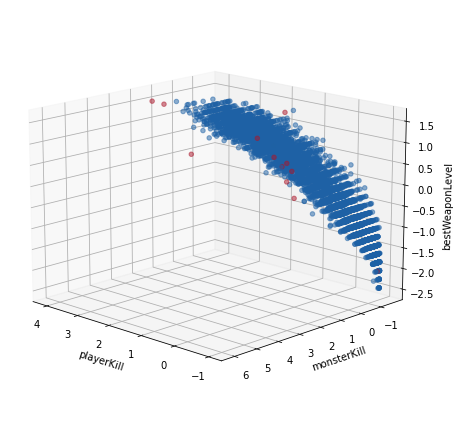

In [193]:
#원본 데이터, 정규화 데이터 중 선택
#predict_select = df_scale
#predict_select = points



# DBSCAN 진행
model = DBSCAN(eps=1,min_samples=35)
predict = pd.DataFrame(model.fit_predict(predict_select))
predict.columns=['predict']

#predict를 합쳐서 r에 합침
r = pd.concat([predict_select,predict],axis=1)

#view 설정
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=15, azim=134)
cmap = ListedColormap(sns.color_palette("RdBu", 10).as_hex())

#3차원 데이터의 축과 내부 데이터 설정 x,y,z임
xString = 'playerKill'
yString = 'monsterKill'
zString = 'bestWeaponLevel'

x = r[xString]
y = r[yString]
z = r[zString]

#ax.scatter(r['playerKill'],r['useEmoticonCount'],r['gameRank'],c=r['predict'],cmap=cmap,alpha=0.5)
ax.scatter(x,y,z,c=r['predict'],cmap=cmap,alpha=0.5,s=20)
ax.set_xlabel(xString)
ax.set_ylabel(yString)
ax.set_zlabel(zString)

#sns.scatterplot(x='playerKill',y='gameRank',hue='predict',data=r,palette='Set2')
#sns.pairplot(r,hue='predict')
plt.show()




In [192]:
r[r.predict == -1]
#r.describe()

,gameRank,playerKill,monsterKill,characterLevel,bestWeaponLevel,damageToPlayer,totalTime,predict
72,-1.165707,3.667756,1.581043,1.119118,1.507732,2.436158,1.232176,-1
163,-1.165707,4.091579,1.521758,1.119118,1.507732,3.242263,1.359106,-1
1885,-0.078508,-0.994302,-1.442499,-1.938292,-2.048477,-1.321450,0.421552,-1
2428,-0.259708,1.972462,-1.146073,-0.409587,0.461788,1.684940,-0.605431,-1
3207,-0.622108,-0.146655,6.027427,0.864334,1.507732,-0.266836,1.165826,-1
3349,0.646291,-0.994302,2.707460,0.099981,0.252599,-0.988208,0.014798,-1
3515,-1.165707,-0.146655,3.063171,1.373902,1.507732,2.447667,1.350452,-1
3714,-0.803307,-0.994302,3.656022,1.119118,1.298543,0.185539,1.177365,-1
4156,-1.165707,1.124815,-0.316081,0.864334,1.507732,4.346959,1.445650,-1
4753,-0.984507,-0.994302,3.063171,1.373902,1.089354,-0.589329,1.416802,-1


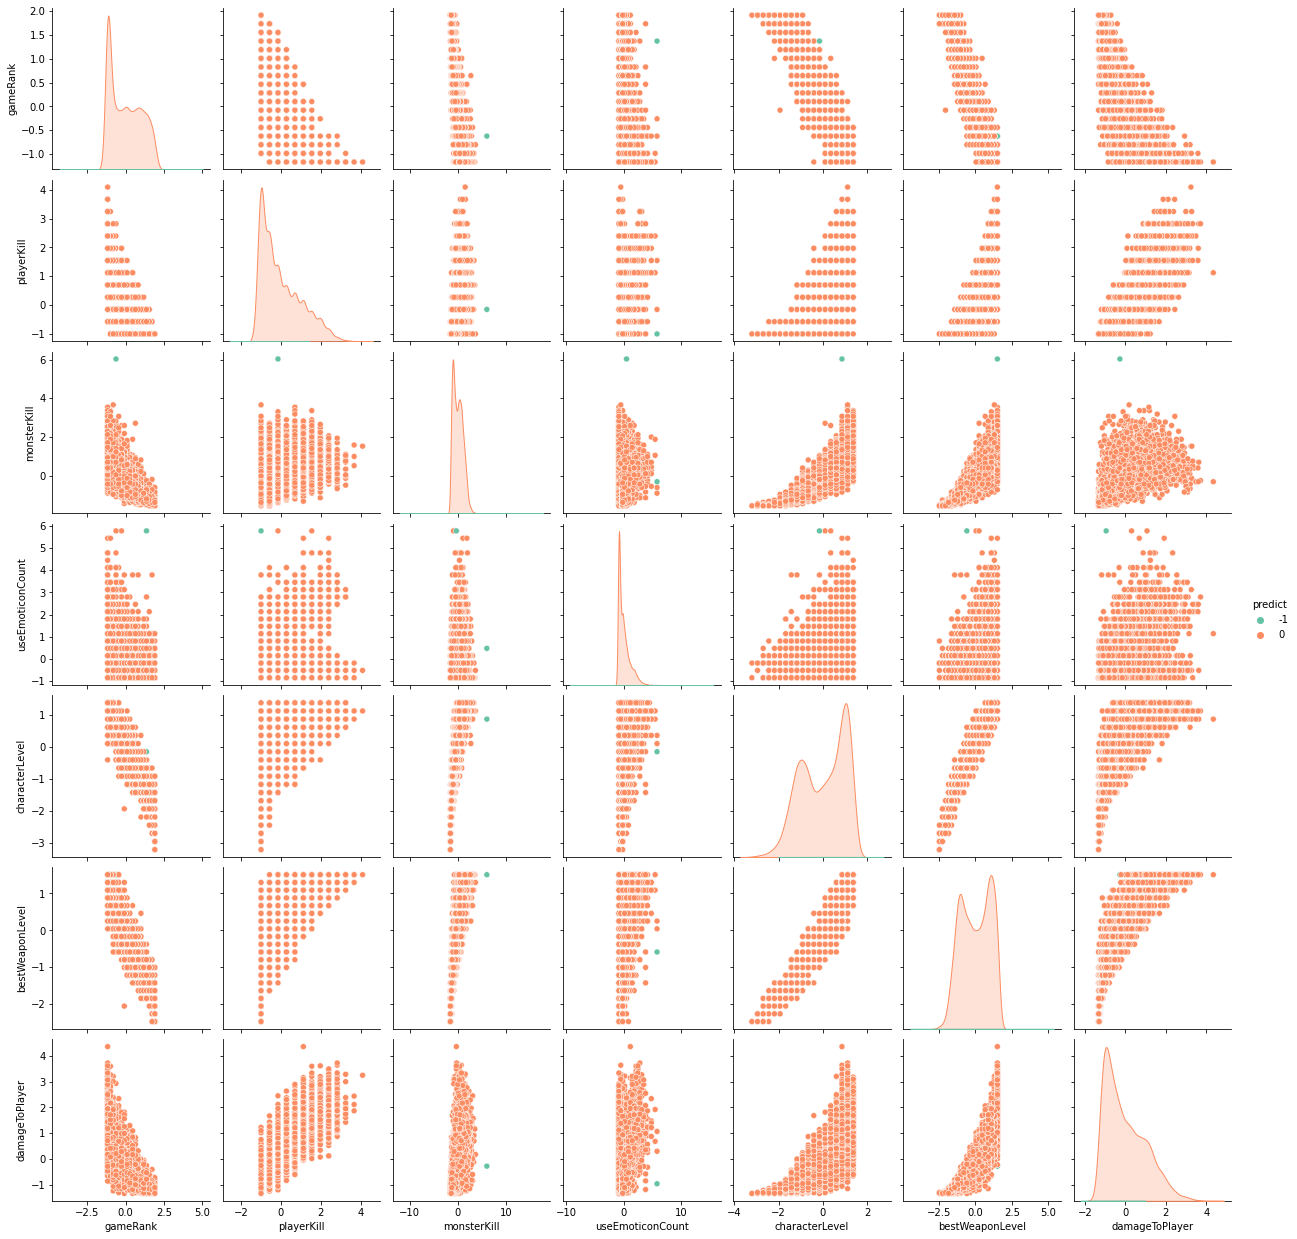

In [45]:
sns.set_palette("pastel")
sns.pairplot(r,hue='predict',palette='Set2')
#plt.show()

C:\Users\dolppe\AppData\Local\Temp/ipykernel_7084/3252070149.py:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=15, azim=134)


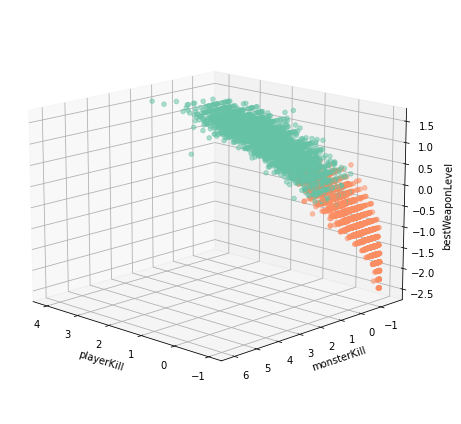

In [16]:

kmeans = KMeans(n_clusters=2)
kmeans.fit(predict_select)

result_by_sklearn = predict_select.copy()
result_by_sklearn["cluster"] = kmeans.labels_
result_by_sklearn.head(n=3)


fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=15, azim=134)
cmap = ListedColormap(sns.color_palette("Set2", 10).as_hex())

#3차원 데이터의 축과 내부 데이터 설정 x,y,z임

x = result_by_sklearn[xString]
y = result_by_sklearn[yString]
z = result_by_sklearn[zString]

#ax.scatter(r['playerKill'],r['useEmoticonCount'],r['gameRank'],c=r['predict'],cmap=cmap,alpha=0.5)
ax.scatter(x,y,z,c=result_by_sklearn['cluster'],cmap=cmap,alpha=0.5)
ax.set_xlabel(xString)
ax.set_ylabel(yString)
ax.set_zlabel(zString)

#sns.scatterplot(x='playerKill',y='gameRank',hue='cluster',data=result_by_sklearn,palette='Set2')


plt.show()


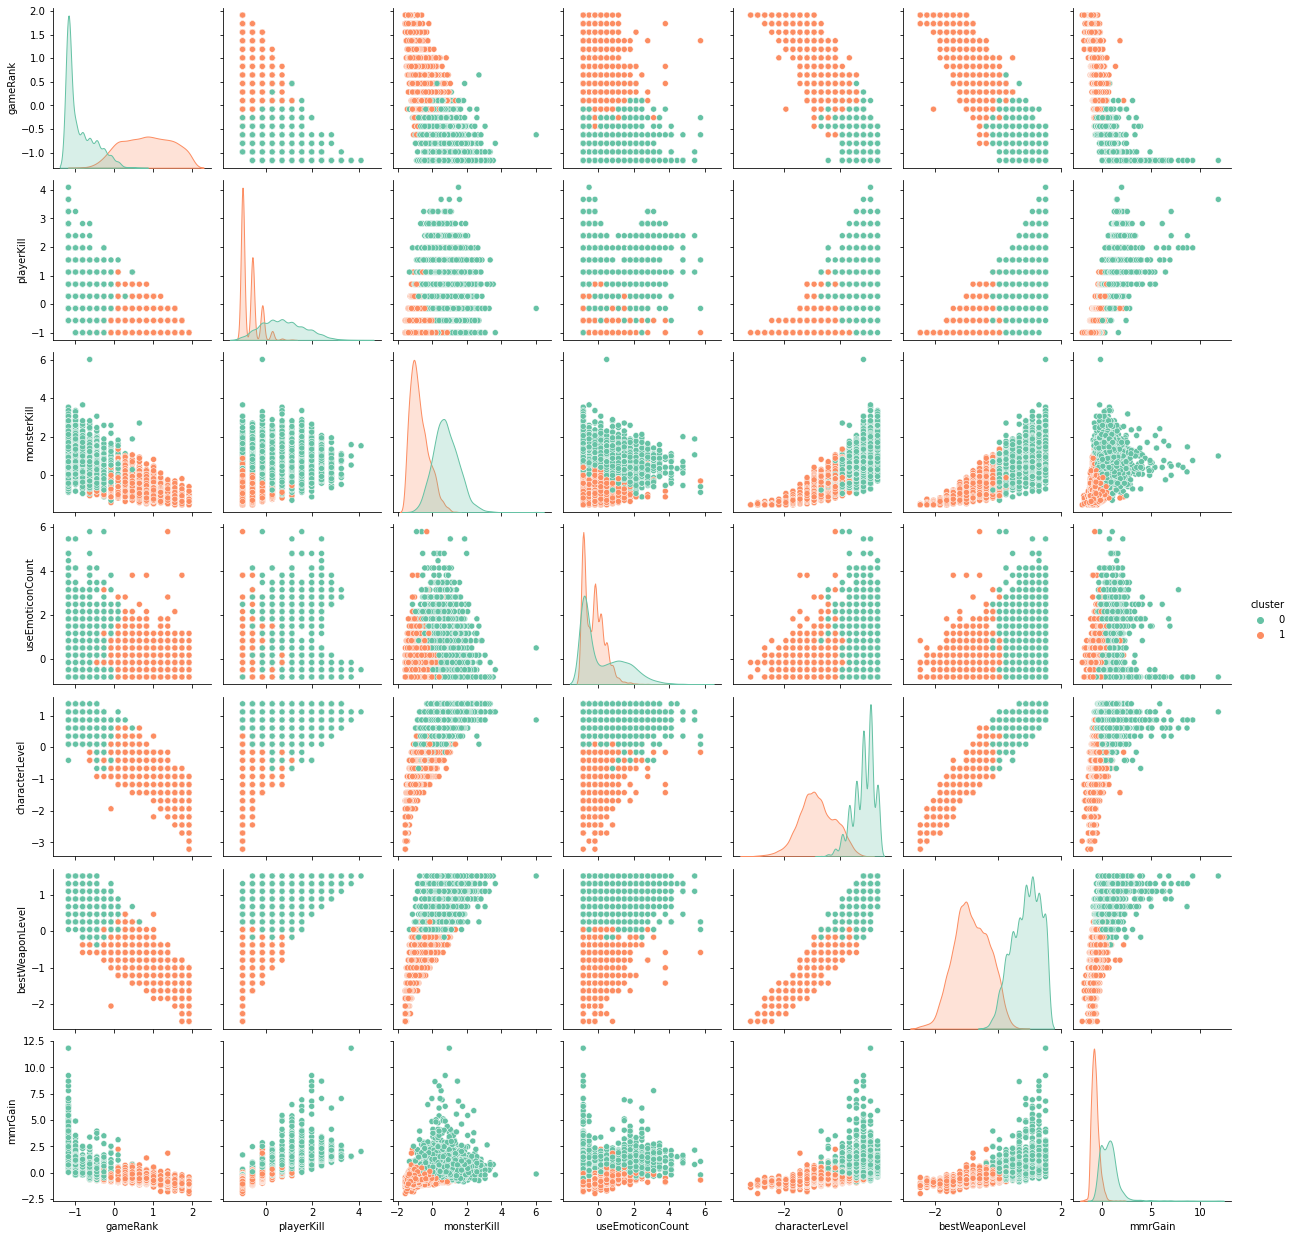

In [17]:
sns.pairplot(result_by_sklearn,hue='cluster',palette='Set2')

plt.show()



In [18]:
file_path1 = "character.json"

with open(file_path1,'r',encoding='UTF-8') as file:
    charjson = json.load(file)


charArr = []
for js in charjson["data"]:
    
    charArr.append(js["name"])


charDF = pandas.DataFrame(charArr).reset_index(drop=True)
charDF.columns = ['characterName']
charDF['cluster'] = result_by_sklearn["cluster"]

result_by_sklearn['characterName'] = charArr
result_by_sklearn.sort_values('cluster').head(n=50)
#result_by_sklearn.head(n=50)
#charDF.head(n=50)
#result_by_sklearn.to_csv('csv.csv',mode='w')

ValueError: Length of values (49) does not match length of index (6144)

In [93]:
print(result_by_sklearn.describe())

       playerKillAverage  monsterKillAverage  bestWeaponLevelAverage  \
count       4.900000e+01        4.900000e+01            4.900000e+01   
mean        1.105692e-15        1.518060e-16            2.492337e-16   
std         1.010363e+00        1.010363e+00            1.010363e+00   
min        -2.922536e+00       -1.674843e+00           -2.697091e+00   
25%        -4.923343e-01       -6.989904e-01           -3.349501e-01   
50%        -6.738123e-02       -1.356614e-01           -1.466190e-03   
75%         4.919285e-01        4.183442e-01            4.641411e-01   
max         2.412642e+00        4.431910e+00            2.894409e+00   

         cluster  
count  49.000000  
mean    0.489796  
std     0.739438  
min     0.000000  
25%     0.000000  
50%     0.000000  
75%     1.000000  
max     2.000000  
